# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *{Yevgeniya Kosheleva}*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [2]:
import networkx as nx
from __future__ import division
import random
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

#### Model A:

At each time step we add a new node with m(≤m0) links that links to
m previous nodes.

1) Generate networks according to the models above (N>1000 nodes)

In [2]:
def model_A (n_0,m,N):
    G = nx.empty_graph(n_0)
    for t in range(N-n_0):
        connection_values_vector=random.sample([i for i in range (n_0+t-1)],  m)
        for node in connection_values_vector:
            G.add_edge(n_0+t, node)
    return G

Generate three networks with parameters: 

a) n_0=2; m=1,N=2000 

b) n_0=4; m=3,N=2000

c) n_0=6; m=5,N=2000 

In [3]:
G=model_A (2,1,2000)
G2=model_A (4,3,2000)
G3=model_A (6,5,2000)

Visualize second network: 

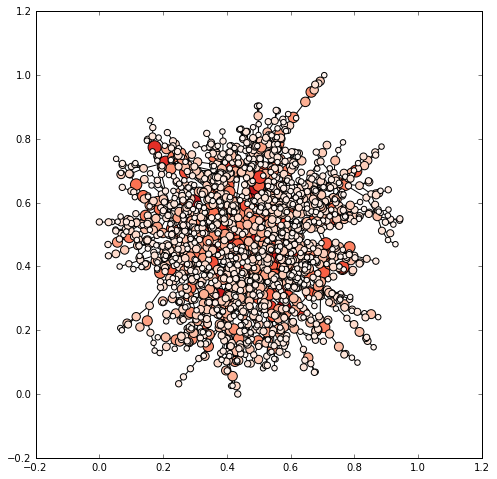

In [4]:
k = nx.degree(G2)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 with_labels=False)


2) Compute CDF/PDF, describe the distribution and compute\describe its properties.

In [ ]:
degrees = G.degree() 
values = sorted(set(degrees.values())) 
hist = [degrees.values().count(x) for x in values]
hist_norm=[i/sum(hist) for i in hist]
cdf = [sum(hist_norm[:i+1]) for i in values]

degrees2 = G2.degree() 
values2 = sorted(set(degrees2.values())) 
hist2 = [degrees2.values().count(x) for x in values2]
hist_norm2=[i/sum(hist2) for i in hist2]
cdf2 = [sum(hist_norm2[:i+1]) for i in values2]

degrees3 = G3.degree() 
values3 = sorted(set(degrees3.values())) 
hist3 = [degrees3.values().count(x) for x in values3]
hist_norm3=[i/sum(hist3) for i in hist3]
cdf3 = [sum(hist_norm3[:i+1]) for i in values3]


In [6]:
x = [x for x in range (40)]
y = [(math.e/5) * math.exp(-k/5 ) for k in x]

Degree distribution for Model A. The symbols correspond to
m=1 (circles), 3 (triangles), 5 (squares). The dashed line follows theoretical degree distribution for m = 5 : $P(k)= \frac{e}{m}\exp{-\frac{k}{m}}$

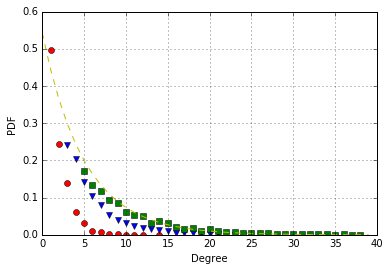

In [7]:

plt.figure() 
plt.grid(True)
plt.plot(values,hist_norm,"ro") 
plt.plot(values2,hist_norm2,'bv')
plt.plot(values3,hist_norm3,'gs')
plt.plot(x,y,'y--')
plt.xlabel('Degree')
plt.ylabel('PDF')
#plt.xlim([-0.1,35])
plt.show()

As an exponential function decays much faster than a power law, it does
not support hubs. Therefore the lack of preferential attachment eliminates
the network’s scale-free character and the hubs. 

CDF of model A:

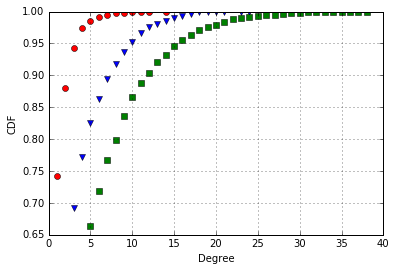

In [8]:
plt.figure() 
plt.grid(True)
plt.plot(values,cdf,"ro") 
plt.plot(values2,cdf2,'bv')
plt.plot(values3,cdf3,'gs')
plt.xlabel('Degree')
plt.ylabel('CDF')
#plt.xlim([0,35])
plt.show()

Illustate average path length  to the number of nodes:

In [14]:
n_0=6
m=5
N=1000
G = nx.empty_graph(n_0)
average_shortest_path=[]
av_clustering=[]
for t in range(N-n_0):
        connection_values_vector=random.sample([i for i in range (n_0+t-1)],  m)
        for node in connection_values_vector:
            G.add_edge(n_0+t, node)
        try: 
            average_shortest_path.append(nx.average_shortest_path_length(G))
        except: average_shortest_path.append(0)
        av_clustering.append(nx.average_clustering(G))

Red line - Average path length to the number of nodes for Model A network with n_0 = 6, m = 5, N = 500

Blue line - Average path length (analytical result) of BA model : L ~ $\frac{\log{N}}{\log{\log{N}}}$

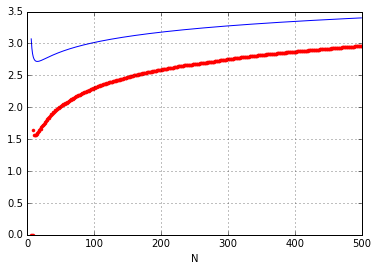

In [37]:
x=[k+n_0 for k in range (494) ]
y=[math.log(N)/math.log(math.log(N)) for N in x]
plt.figure() 
plt.grid(True)
plt.plot(x,average_shortest_path,"r.") 
plt.plot(x,y)
plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

Illustate average clustering coefficient  to the number of nodes:

Red line -  Average clustering coefficient to the number of nodes for Model A network with n_0 = 6, m = 5, N = 500

Blue line -  Average clustering coefficient of BA model :  C ~ $ N^{-0.75}$

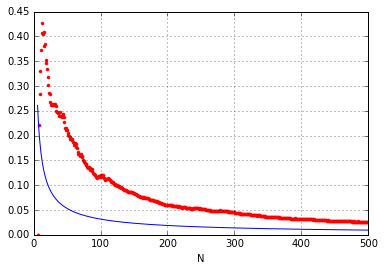

In [39]:
x=[k+n_0 for k in range (494) ]
y=[math.pow(N, -0.75) for N in x]
plt.figure() 
plt.grid(True)
plt.plot(x,av_clustering,"r.") 
plt.plot(x,y)
plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

Illustate average node degee to the nodes "age":

In [102]:
G = nx.empty_graph(n_0)
age=[[]]
N=1000
m=2
n_0=3
for t in range(N-n_0):
        connection_values_vector=random.sample([i for i in range (n_0+t-1)],  m)
        for node in connection_values_vector:
            G.add_edge(n_0+t, node)
        age.append([])
        age[t+1].append(np.mean(list(G.degree([i for i in range(n_0)]).values())))
        
        for a in range(t+1):
            age[a].append(G.degree(a+n_0)) 
age=[np.mean(i) for i in age]

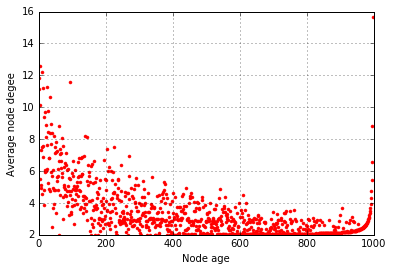

In [103]:
x=[i for i in range(len(age))]
plt.figure() 
plt.grid(True)
plt.plot(x,age,"r.") 
#plt.plot(x,y)
plt.xlabel('Node age')
plt.ylabel('Average node degee')
#plt.xlim([0,35])
plt.show()

#### Model B:

At each time step a node is selected randomly and connects to a node i
with degree ki already present in the network, where i is chosen with
probability $p_{ki} = \frac{ki}{\sum_{j}k_j}$
In Model B, the number of nodes remains constant during the network’s
evolution, but the number of links increases linearly with time

In Model B, the number of nodes remains constant during the network’s
evolution, but the number of links increases linearly with time. 

1) Generate networks according to the models above 

In [178]:
def model_B (N,T):
    G = nx.fast_gnp_random_graph(N,0.01)
    for t in range(T):
        selected_node=random.randint(0, N-1)
        for node in range (N):
            if node != selected_node:
                p = G.degree(node)/sum(list(G.degree([i for i in range (N)]).values()))
                value = np.random.choice([0,1], 1, p=[1-p, p])[0]
                if value == 1: G.add_edge(node, selected_node)
    return G

2) Compute CDF/PDF, describe the distribution and compute\describe its properties.

In [179]:
G=model_B (1000,50)

In [180]:
G2=model_B (1000,200)

In [181]:
G3=model_B (1000,600)

In [182]:
degrees = G.degree() 
values = sorted(set(degrees.values())) 
hist = [degrees.values().count(x) for x in values]
hist_norm=[i/sum(hist) for i in hist]
cdf = [sum(hist_norm[:i+1]) for i in values]

degrees2 = G2.degree() 
values2 = sorted(set(degrees2.values())) 
hist2 = [degrees2.values().count(x) for x in values2]
hist_norm2=[i/sum(hist2) for i in hist2]
cdf2 = [sum(hist_norm2[:i+1]) for i in values2]

degrees3 = G3.degree() 
values3 = sorted(set(degrees3.values())) 
hist3 = [degrees3.values().count(x) for x in values3]
hist_norm3=[i/sum(hist3) for i in hist3]
cdf3 = [sum(hist_norm3[:i+1]) for i in values3]

Degree distribution for Model B. The symbols correspond to
t=50 (circles), t=200 (triangles), t = 600 (squares).

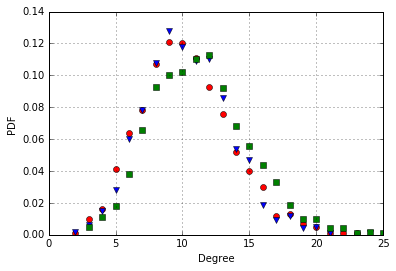

In [183]:
plt.figure() 
plt.grid(True)
plt.plot(values,hist_norm,"ro") 
plt.plot(values2,hist_norm2,'bv')
plt.plot(values3,hist_norm3,'gs')

plt.xlabel('Degree')
plt.ylabel('PDF')
#plt.xlim([0,140])
plt.show()

The model B develops a degree distribution with a power-law tail. pk
 is not stationary, as after roughly $T ≃ N^2$ time steps the network
converges to a complete graph. Consequently, after a transient period
(t ≪ N) the node degrees start to converge to the average degree $k_i(t)=\frac{2}{N}*t$ and the degree distribution becomes peaked. For t → N(N-1)/2 the network turns into
a complete graph. Therefore, in
the absence of growth the network is not stationary, becoming a complete
graph with time.

CDF of model B:

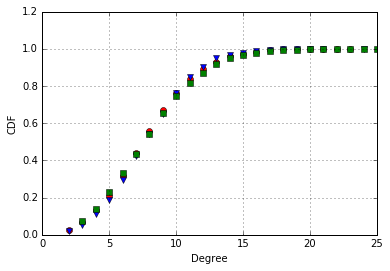

In [184]:
plt.figure() 
plt.grid(True)
plt.plot(values,cdf,"ro") 
plt.plot(values2,cdf2,'bv')
plt.plot(values3,cdf3,'gs')
plt.xlabel('Degree')
plt.ylabel('CDF')
#plt.xlim([0,140])
plt.show()

Illustate average path length  to the number of nodes:

In [187]:
N=800
av_path=[]
av_clustering=[]
for n in range (10):
    G = model_B (N+n*10,50)
    try:
        av_path.append(nx.average_shortest_path_length(G))  
    except: av_path.append(0)
    av_clustering.append(nx.average_clustering(G))

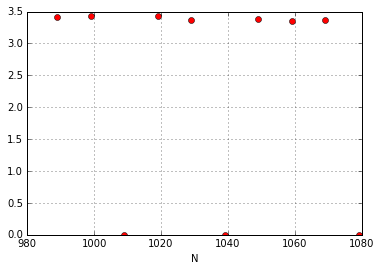

In [190]:
x=[N+n*10 for n in range (10) ]
plt.figure() 
plt.grid(True)
plt.plot(x,av_path,"ro") 

plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

Illustate average clustering coefficient to the number of nodes:

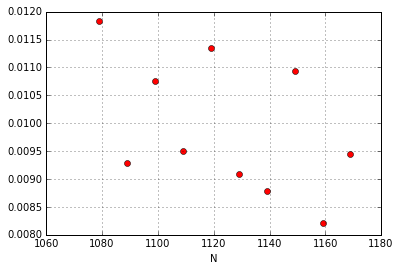

In [191]:
x=[N+n*10 for n in range (10) ]
plt.figure() 
plt.grid(True)
plt.plot(x,av_clustering,"ro") 

plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

Illustate average node degee to the nodes "age":

In [196]:
age=[]
N=1000
T=50
G = nx.fast_gnp_random_graph(N,0.01)
for t in range(T):
    selected_node=random.randint(0, N-1)
    for node in range (N):
        if node != selected_node:
            p = G.degree(node)/sum(list(G.degree([i for i in range (N)]).values()))
            value = np.random.choice([0,1], 1, p=[1-p, p])[0]
            if value == 1: G.add_edge(node, selected_node)
    age.append(np.mean(list(G.degree(G.nodes()).values())))

In [200]:
age2=[]
N=1500
T=50
G = nx.fast_gnp_random_graph(N,0.01)
for t in range(T):
    selected_node=random.randint(0, N-1)
    for node in range (N):
        if node != selected_node:
            p = G.degree(node)/sum(list(G.degree([i for i in range (N)]).values()))
            value = np.random.choice([0,1], 1, p=[1-p, p])[0]
            if value == 1: G.add_edge(node, selected_node)
    age2.append(np.mean(list(G.degree(G.nodes()).values())))

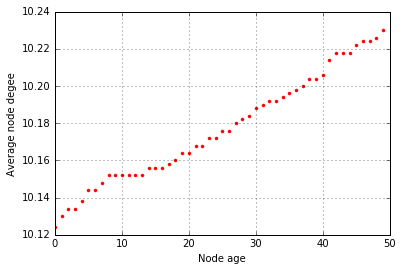

In [197]:
x=[i for i in range(len(age))]
plt.figure() 
plt.grid(True)
plt.plot(x,age,"r.") 
plt.plot(x,age2,"b.")
#plt.plot(x,y)
plt.xlabel('Node age')
plt.ylabel('Average node degee')
#plt.xlim([0,35])
plt.show()

In summary, the failure of Models A and B to reproduce the empirically
observed scale-free distribution indicates that growth and preferential attachment
are simultaneously needed for the emergence of the scale-free
property.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

1) Generate networks according to the models above (N>1000 nodes)

In [24]:
def vertex_coping_model(N,q,T):
    G = nx.fast_gnp_random_graph(N,0.01)
    for t in range(T):
        selected_node=random.randint(0, N-1)
        if len(G.neighbors(selected_node))>0:
            for node in  G.neighbors(selected_node):
                value = np.random.choice([0,1], 1, p=[1-q, q])[0]
                if value == 1:
                    G.add_edge(N+t, node)
                else: 
                    random_node=random.randint(0, N-1)
                    G.add_edge(N+t, random_node)
        else: else: G.add_node(N+t)
    return(G)
            

Visualize network with N = 100, q = 0.5, t=100 : 

In [32]:
G = vertex_coping_model(100,0.5,100)

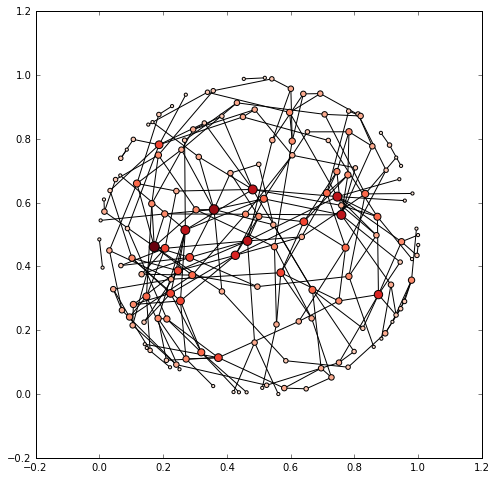

In [33]:
k = nx.degree(G)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*10 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 with_labels=False)

Much like the preferential attachment mechanism, the vertex copying mechanism will tend to produce
a “rich get richer” effect, as vertices with many connections to them have a higher probability
that one of their neighbors will be chosen for copying, and when such an event occurs, their degree
will increase.

2) Compute CDF/PDF, describe the distribution and compute\describe its properties.

a) With different q,  The symbols correspond to q=0.1 (circles), 0.5 (triangles), 0.8 (squares).:

In [34]:
G = vertex_coping_model(2000,0.1,100)
G2 = vertex_coping_model(2000,0.5,100)
G3 = vertex_coping_model(2000,0.8,100)

In [35]:
degrees = G.degree() 
values = sorted(set(degrees.values())) 
hist = [degrees.values().count(x) for x in values]
hist_norm=[i/sum(hist) for i in hist]
cdf = [sum(hist_norm[:i+1]) for i in values]

degrees2 = G2.degree() 
values2 = sorted(set(degrees2.values())) 
hist2 = [degrees2.values().count(x) for x in values2]
hist_norm2=[i/sum(hist2) for i in hist2]
cdf2 = [sum(hist_norm2[:i+1]) for i in values2]

degrees3 = G3.degree() 
values3 = sorted(set(degrees3.values())) 
hist3 = [degrees3.values().count(x) for x in values3]
hist_norm3=[i/sum(hist3) for i in hist3]
cdf3 = [sum(hist_norm3[:i+1]) for i in values3]

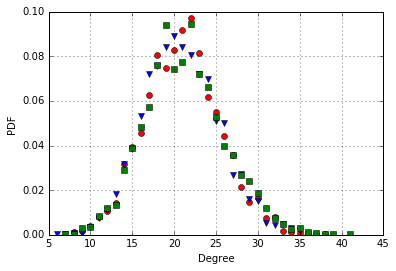

In [37]:

plt.figure() 
plt.grid(True)
plt.plot(values,hist_norm,"ro") 
plt.plot(values2,hist_norm2,'bv')
plt.plot(values3,hist_norm3,'gs')
#plt.plot(x,y,'y--')
plt.xlabel('Degree')
plt.ylabel('PDF')
#plt.xlim([-0.1,35])
plt.show()

heavy-tailed degree distributions

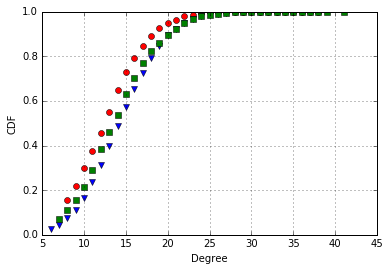

In [38]:
plt.figure() 
plt.grid(True)
plt.plot(values,cdf,"ro") 
plt.plot(values2,cdf2,'bv')
plt.plot(values3,cdf3,'gs')
plt.xlabel('Degree')
plt.ylabel('CDF')
#plt.xlim([0,35])
plt.show()

b) With different time. The symbols correspond to T=100 (circles), 500 (triangles), 1000 (squares):

In [48]:
G = vertex_coping_model(2000,0.5,100)
G2 = vertex_coping_model(2000,0.5,500)
G3 = vertex_coping_model(2000,0.5,1000)

In [49]:
degrees = G.degree() 
values = sorted(set(degrees.values())) 
hist = [degrees.values().count(x) for x in values]
hist_norm=[i/sum(hist) for i in hist]
cdf = [sum(hist_norm[:i+1]) for i in values]

degrees2 = G2.degree() 
values2 = sorted(set(degrees2.values())) 
hist2 = [degrees2.values().count(x) for x in values2]
hist_norm2=[i/sum(hist2) for i in hist2]
cdf2 = [sum(hist_norm2[:i+1]) for i in values2]

degrees3 = G3.degree() 
values3 = sorted(set(degrees3.values())) 
hist3 = [degrees3.values().count(x) for x in values3]
hist_norm3=[i/sum(hist3) for i in hist3]
cdf3 = [sum(hist_norm3[:i+1]) for i in values3]

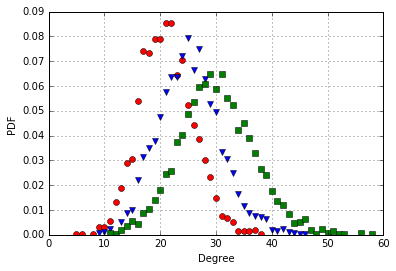

In [52]:
plt.figure() 
plt.grid(True)
plt.plot(values,hist_norm,"ro") 
plt.plot(values2,hist_norm2,'bv')
plt.plot(values3,hist_norm3,'gs')
#plt.plot(x,y,'y--')
plt.xlabel('Degree')
plt.ylabel('PDF')
#plt.xlim([-0.1,35])
plt.show()

 As T increases, the heavy tail becomes more prominent, the variance increases, and we an easily spot high-degree vertices within the network.

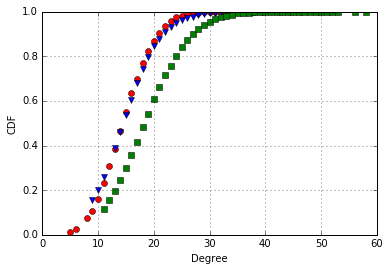

In [53]:
plt.figure() 
plt.grid(True)
plt.plot(values,cdf,"ro") 
plt.plot(values2,cdf2,'bv')
plt.plot(values3,cdf3,'gs')
plt.xlabel('Degree')
plt.ylabel('CDF')
#plt.xlim([0,35])
plt.show()

Illustate average path length  to the number of nodes:

In [3]:
N = 100
q = 0.3
T = 10
average_shortest_path = []
av_clustering = []
G = nx.fast_gnp_random_graph(N,0.01)
for t in range(T):
    selected_node=random.randint(0, N-1)
    if len(G.neighbors(selected_node))>0:
        for node in  G.neighbors(selected_node):
            value = np.random.choice([0,1], 1, p=[1-q, q])[0]
            if value == 1:
                G.add_edge(N+t, node)
            else: 
                random_node=random.randint(0, N-1)
                G.add_edge(N+t, random_node)
    else: G.add_node(N+t)
                
    try: 
            average_shortest_path.append(nx.average_shortest_path_length(G))
    except: average_shortest_path.append(0)
    av_clustering.append(nx.average_clustering(G))

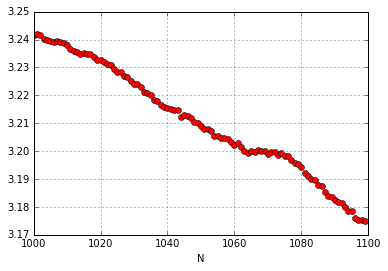

In [8]:
x=[N+t for t in range (100) ]
plt.figure() 
plt.grid(True)
plt.plot(x,average_shortest_path,"ro") 
plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

In [5]:
print(len(average_shortest_path))

100


Illustate average clustering coefficient to the number of nodes:

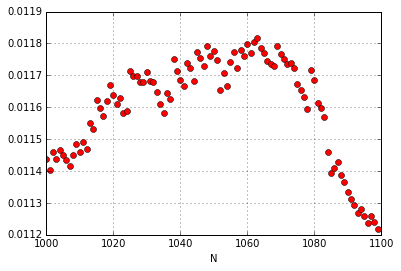

In [9]:
x=[N+t for t in range (100) ]
plt.figure() 
plt.grid(True)
plt.plot(x,av_clustering,"ro") 

plt.xlabel('N')
#plt.xlim([0,35])
plt.show()

Illustate average node degee to the nodes "age":

In [38]:
G = nx.fast_gnp_random_graph(N,0.1)
age=[[]]
N = 1000
q = 0.3
T = 1000
for t in range(T):
    selected_node=random.randint(0, N-1)
    if len(G.neighbors(selected_node))>0:
        for node in  G.neighbors(selected_node):
            value = np.random.choice([0,1], 1, p=[1-q, q])[0]
            if value == 1:
                G.add_edge(N+t, node)
            else: 
                random_node=random.randint(0, N-1)
                G.add_edge(N+t, random_node)
    else: G.add_node(N+t)

    age.append([])
    age[t+1].append(np.mean(list(G.degree([i for i in range(N)]).values())))

    for a in range(t+1):
        age[a].append(G.degree(a+N)) 
    

age=[np.mean(i) for i in age]

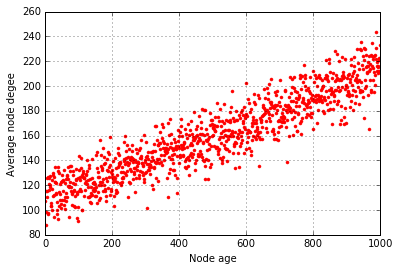

In [39]:
x=[i for i in range(len(age))]
plt.figure() 
plt.grid(True)
plt.plot(x,age,"r.") 
#plt.plot(x,y)
plt.xlabel('Node age')
plt.ylabel('Average node degee')
#plt.xlim([0,35])
plt.show()